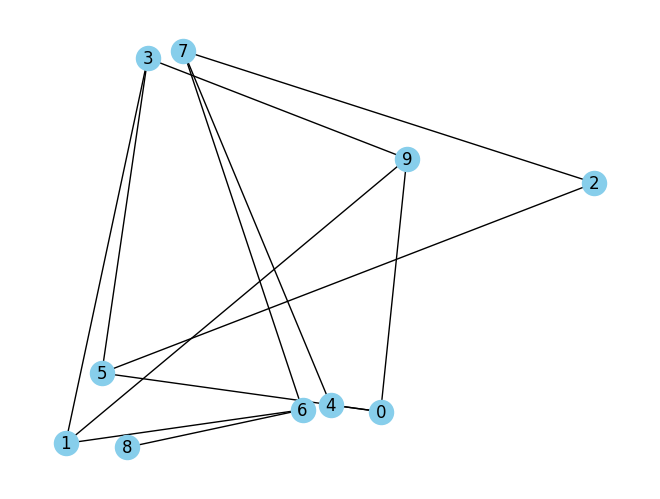

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def r_g_g(n, m):
    while True:
        G = nx.Graph()
        
        # Add nodes with random positions
        for i in range(n):
            x = random.random()
            y = random.random()
            G.add_node(i, pos=(x, y))
        
        # Add edges between nodes within radius
        for i in range(m):
            v1 = random.choice(list(G.nodes))
            v2 = random.choice(list(G.nodes - set([v1])))
            G.add_edge(v1, v2)
        if nx.is_connected(G):
            return G

# Parameters
n = 10  # Number of nodes
m = 14   # Maximum distance for connecting nodes

# Create random geometric graph
G = r_g_g(n, m)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue')
plt.show()

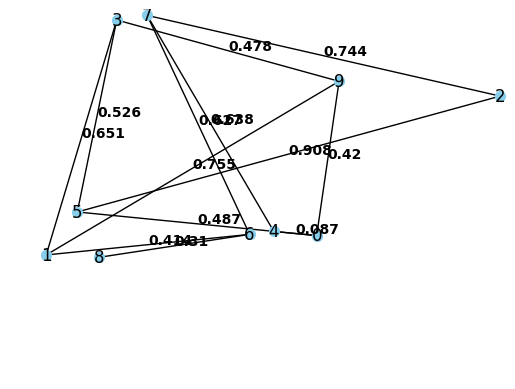

In [3]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 3)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(G, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in G.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


u: 0 in v: 3 razdalja: 0.354
u: 0 in v: 2 razdalja: 0.711
u: 1 in v: 3 razdalja: 0.941
u: 2 in v: 3 razdalja: 1.061
u: 3 in v: 4 razdalja: 0.57
u: 4 in v: 5 razdalja: 0.221
Shortest path to vertex 3: [3], distance: 0.354
Shortest path to vertex 2: [2], distance: 0.711
Shortest path to vertex 4: [3, 4], distance: 0.9239999999999999
Shortest path to vertex 1: [3, 1], distance: 1.295
Shortest path to vertex 5: [3, 4, 5], distance: 1.145


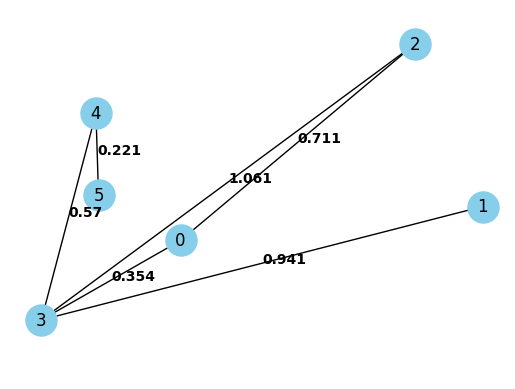

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque



def obtezen_graf(n, m):
    while True:
        G = nx.Graph()
        
        # Add nodes with random positions
        for i in range(n):
            x = random.random()
            y = random.random()
            G.add_node(i, pos=(x, y))
        
        # Add edges between nodes within radius
        for i in range(m):
            v1 = random.choice(list(G.nodes))
            v2 = random.choice(list(G.nodes - set([v1])))
            G.add_edge(v1, v2)
        if nx.is_connected(G):
            pos = nx.get_node_attributes(G, 'pos')
            # Assign weights to edges based on Euclidean distances
            for (u, v) in G.edges():
                G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 3)
            
            return G


def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = deque([start])
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.popleft()
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

# Create a sample graph
G = obtezen_graf(6,7)

for (u, v) in G.edges():
    print(f"u: {u} in v: {v} razdalja: {G.edges[u, v]['weight']}")

# Calculate shortest paths and distances from vertex 0
shortest_paths, distances = bfs_shortest_paths(G, 0)

# Print shortest paths and distances to all vertices
for vertex, path in shortest_paths.items():
    print(f"Shortest path to vertex {vertex}: {path}, distance: {distances[vertex]}")


# Draw the graph
pos = nx.get_node_attributes(G, 'pos')  # Get positions

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(G, pos, ax=ax, with_labels=True, node_size=500, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in G.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


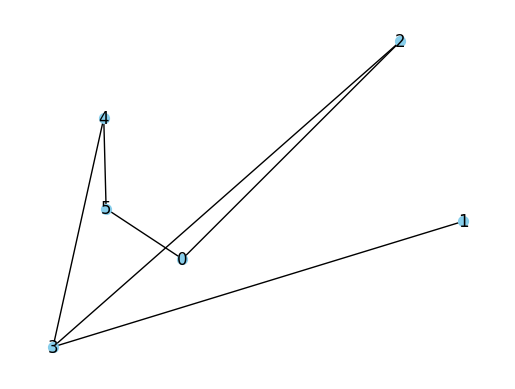

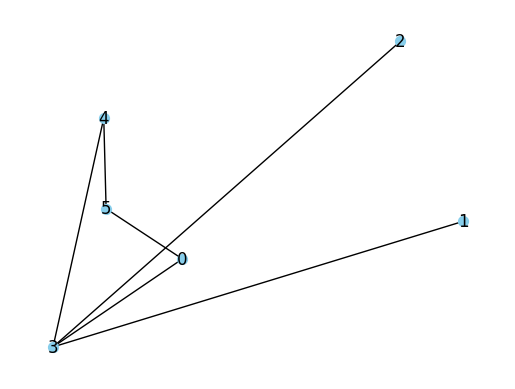

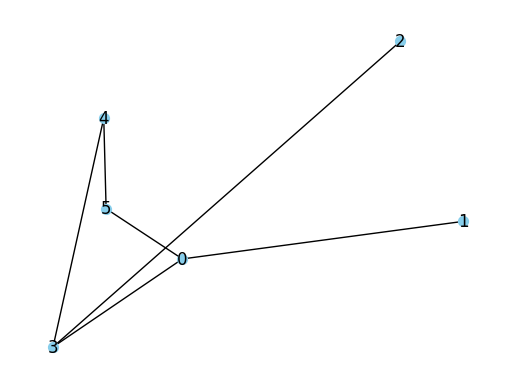

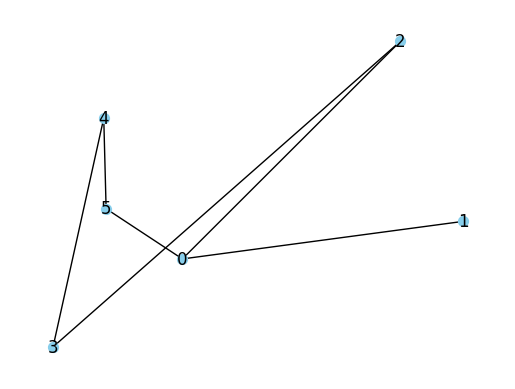

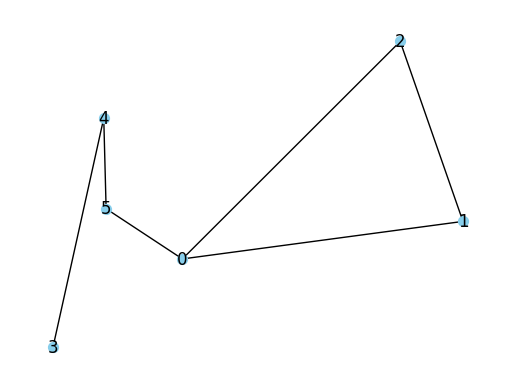

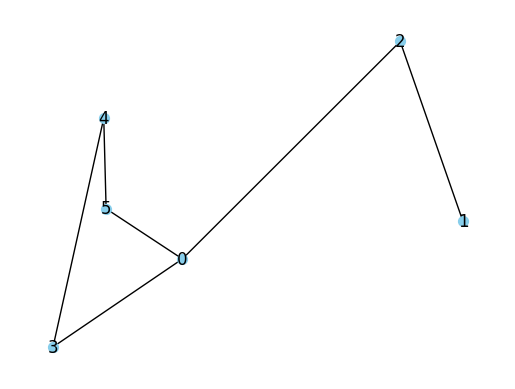

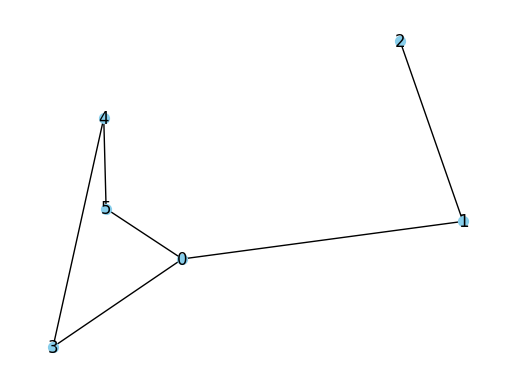

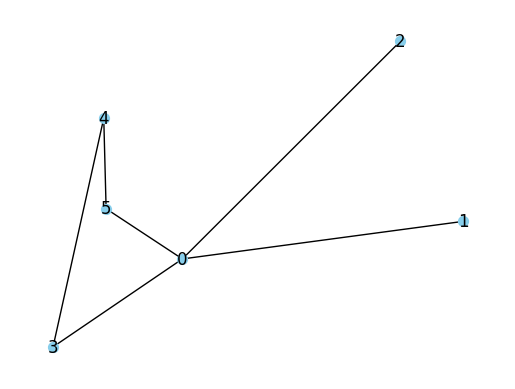

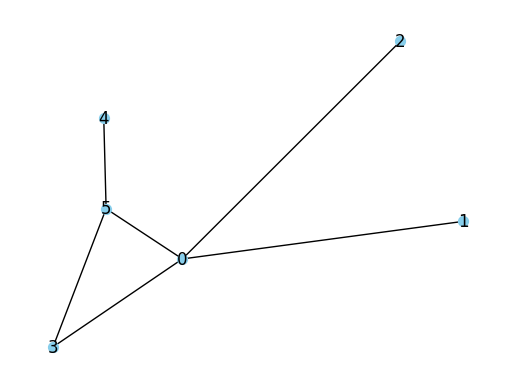

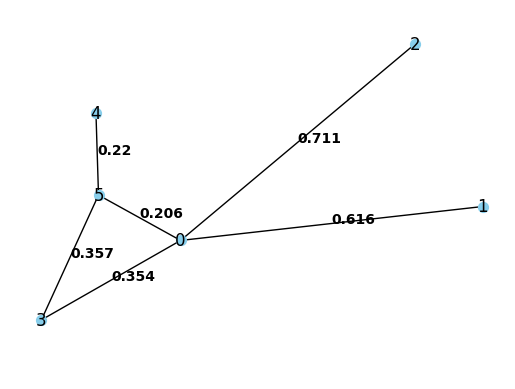

In [8]:
import math


def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 2)

def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = []
    queue.append(start)
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.pop(0)
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def vsota_razdalj(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    vsota = 0
    for vertex, path in shortest_paths.items():
        vsota += distances[vertex]
    return vsota

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 3)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        else:
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
    return loop_sum(graf)

# Create a sample graph
opti = ekzaktno_sum(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


1
1
3


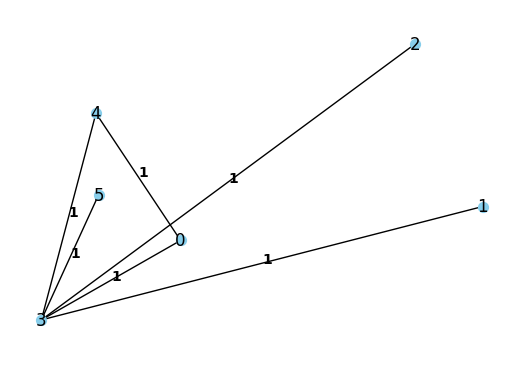

In [11]:
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = 1

def ekzaktno_sum_1(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = 1
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('2')
                            return loop_sum(ravnovesni_graf)
                        else:
                            print('3')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('1')
                                return loop_sum(ravnovesni_graf)
        
    
    return loop_sum(graf)


# Create a sample graph
opti = ekzaktno_sum_1(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

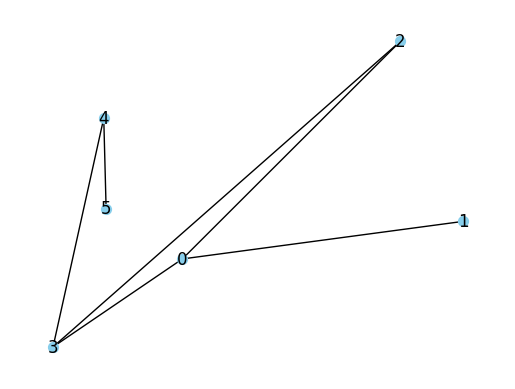

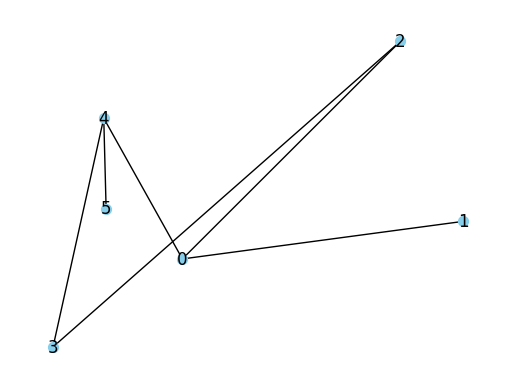

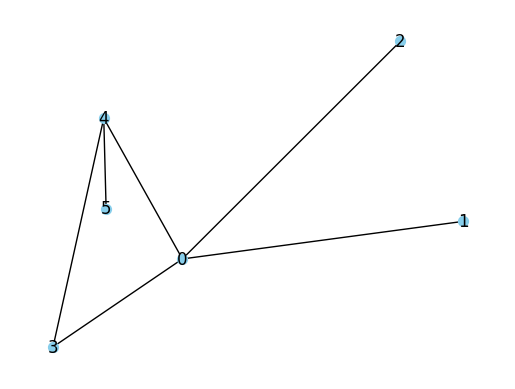

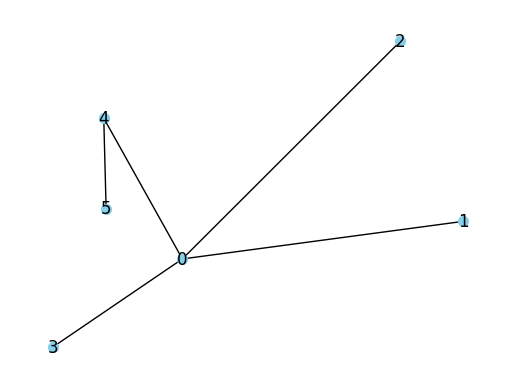

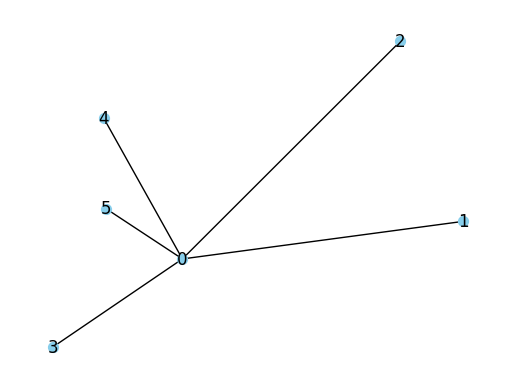

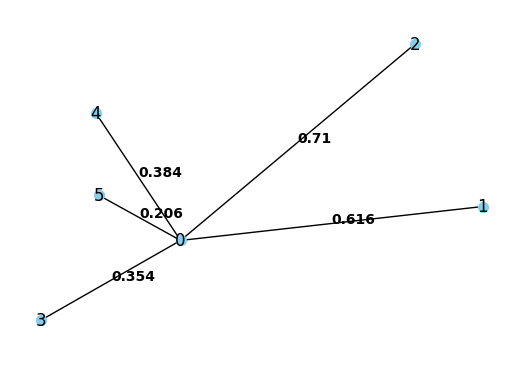

In [13]:
# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 2)

def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = []
    queue.append(start)
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.pop(0)
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def lok_prem(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    maks = 0
    for vertex, path in shortest_paths.items():
        if maks < distances[vertex]:
            maks = distances[vertex]
    return maks

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) >= lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 3)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        else:
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
    return loop_sum(graf)

# Create a sample graph
opti = ekzaktno_sum(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

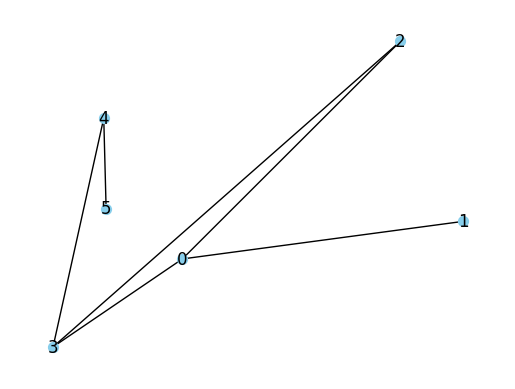

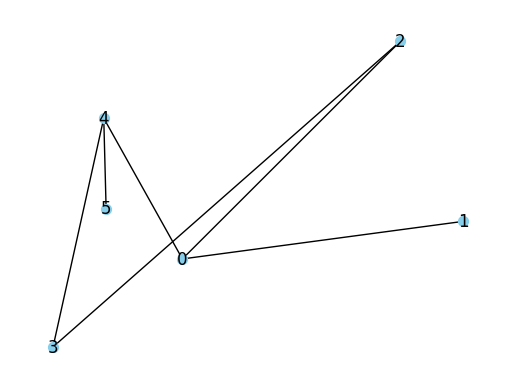

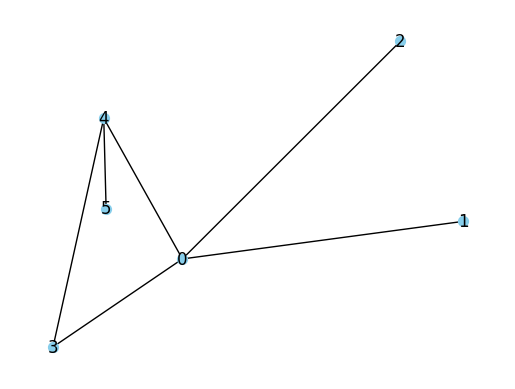

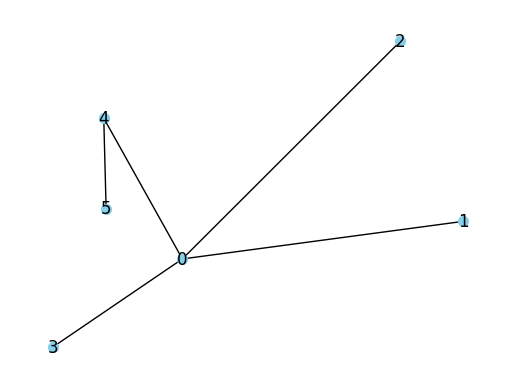

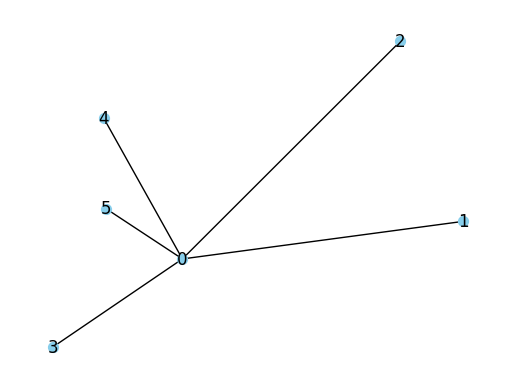

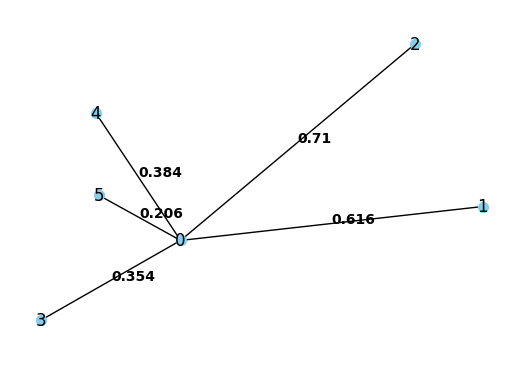

In [18]:
# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 2)

def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = []
    queue.append(start)
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.pop(0)
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def lok_prem(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    maks = 0
    for vertex, path in shortest_paths.items():
        if maks < distances[vertex]:
            maks = distances[vertex]
    return maks

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 3)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        else:
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) >= lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
    return loop_sum(graf)

# Create a sample graph
opti = ekzaktno_sum(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

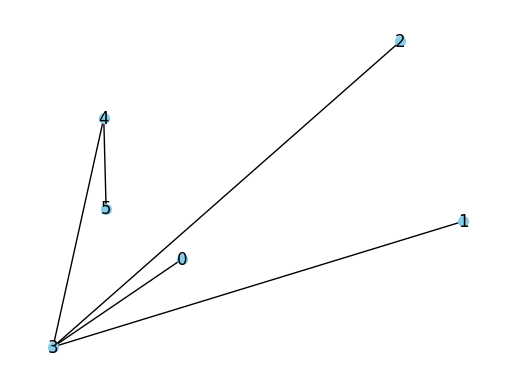

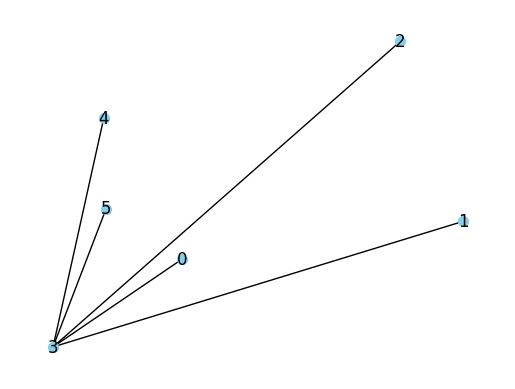

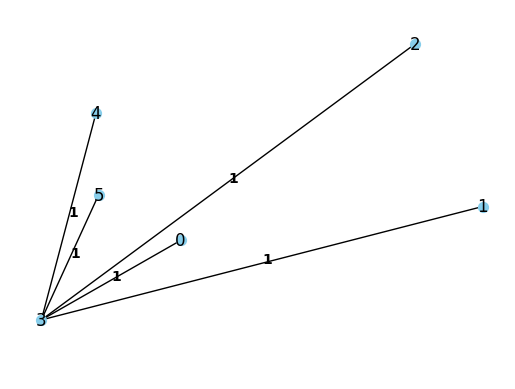

In [19]:
# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = 1
def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = []
    queue.append(start)
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.pop(0)
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def lok_prem(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    maks = 0
    for vertex, path in shortest_paths.items():
        if maks < distances[vertex]:
            maks = distances[vertex]
    return maks

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) >= lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = 1
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        else:
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
    return loop_sum(graf)

# Create a sample graph
opti = ekzaktno_sum(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

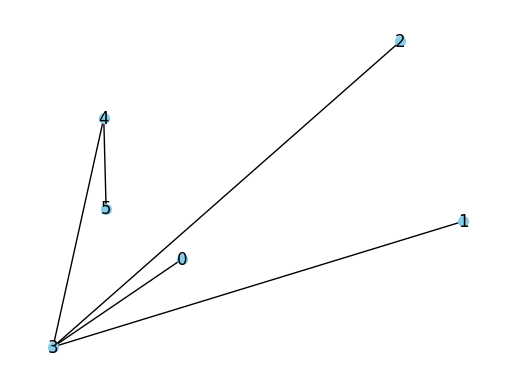

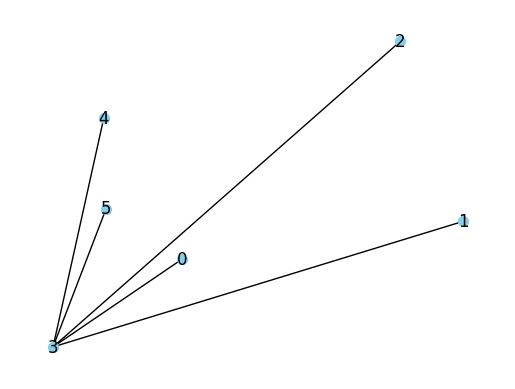

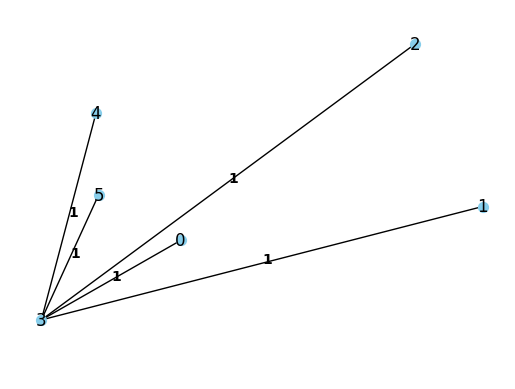

In [20]:
# Draw the graph
pos = nx.get_node_attributes(G, 'pos')

for (u, v) in G.edges():
        G.edges[u, v]['weight'] = 1

def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = []
    queue.append(start)
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.pop(0)
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def lok_prem(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    maks = 0
    for vertex, path in shortest_paths.items():
        if maks < distances[vertex]:
            maks = distances[vertex]
    return maks

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = 1
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        else:
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) > lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    if nx.is_connected(testni_graf):
                            if lok_prem(graf, v1) >= lok_prem(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                fig, ax = plt.subplots()
                                nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                                return loop_sum(ravnovesni_graf)
    return loop_sum(graf)

# Create a sample graph
opti = ekzaktno_sum(G)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()